# Lab 3: Classifiers

Here we'll dive into the basic principles of machine learning, and how to utilize them via the Scikit-Learn API.

## The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an Estimator object. For instance a multinomial Naive Bayes is implemented as so:

In [1]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

clf = MultinomialNB()

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [2]:
print(clf.get_params())
print(clf.__dict__)

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}
{'alpha': 1.0, 'fit_prior': True, 'class_prior': None, 'force_alpha': 'warn'}


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [1]:
rng = np.random.RandomState(1)
num_classes = 6
num_samples = 60
num_features = 10
X = rng.randint(3, size=(num_samples, num_features))
y = np.array([i for i in range(num_classes)]*10)
clf.fit(X, y)
#print(clf.get_params())
print(clf.__dict__)
print(clf.feature_log_prob_.shape)

NameError: name 'np' is not defined

Let's inspect the data

In [4]:
print(X)
print(y)

[[1 0 0 1 1 0 0 1 0 1]
 [0 2 1 2 0 2 1 2 0 0]
 [2 0 1 2 2 0 1 1 2 0]
 [2 1 1 1 1 2 1 1 0 0]
 [1 0 0 1 2 1 0 2 2 1]
 [1 1 0 0 1 0 2 0 0 1]
 [1 2 0 0 1 2 2 1 0 2]
 [1 2 1 0 1 1 2 0 0 2]
 [2 1 0 2 2 2 0 0 1 1]
 [1 0 0 1 1 2 0 1 2 2]
 [0 1 1 0 0 0 2 0 1 0]
 [1 0 0 2 0 1 2 0 1 1]
 [0 2 0 0 0 0 1 2 0 1]
 [0 2 1 2 0 0 2 2 2 0]
 [1 2 2 2 2 0 2 1 1 2]
 [0 2 0 2 1 1 1 2 1 1]
 [0 2 0 1 0 1 1 0 1 1]
 [1 2 1 0 0 2 1 0 0 1]
 [2 1 1 0 1 0 1 0 1 1]
 [1 1 0 2 1 0 0 2 1 0]
 [2 2 2 0 1 1 1 1 2 0]
 [0 2 0 1 0 2 0 2 2 0]
 [1 0 0 0 1 2 1 0 0 0]
 [1 2 0 0 2 2 2 2 1 2]
 [0 2 0 0 0 0 1 2 2 1]
 [1 0 2 2 2 0 2 2 1 0]
 [0 0 0 2 1 1 0 2 2 1]
 [2 1 2 1 2 0 0 2 2 0]
 [1 2 0 2 0 1 0 0 2 0]
 [2 1 2 0 0 0 0 2 2 0]
 [2 1 1 1 0 1 2 1 2 2]
 [1 0 1 2 2 0 0 0 2 0]
 [1 0 2 2 0 1 1 2 1 2]
 [0 1 1 0 1 1 2 2 0 2]
 [0 2 0 2 2 0 2 0 2 0]
 [1 2 1 0 2 2 2 0 1 2]
 [1 1 1 1 0 1 2 1 0 0]
 [2 2 1 0 0 0 2 2 0 1]
 [1 1 2 1 1 0 1 2 0 0]
 [0 2 1 1 1 0 0 0 2 1]
 [2 2 0 1 0 1 2 2 0 2]
 [2 2 2 0 1 2 0 0 1 1]
 [1 0 2 2 2 0 2 0 0 2]
 [1 2 2 0 2

Let's see some useful methods for predict new instances along with their scores:

In [5]:
print(clf.predict(X[2:3]))
print(clf.predict_proba(X[2:3]))

[3]
[[0.05467113 0.24526107 0.54463394 0.05968024 0.08035617 0.01539745]]


Scikit-Learn provides a method for having a global score of the trained model:

In [6]:
print(clf.score(X, y))

0.38333333333333336


## Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

## Let's dive into Scikit-learn's classifiers

Set a seed to obtain the same sequence of random numbers

In [2]:
import pdb
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

We test our classifiers on some synthetic data. Look at the `datasets` module of Sklearn.

In [3]:
from sklearn import cluster, datasets

n_samples = 5000

# Let's create some artificial datasets
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.3)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.4)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8, cluster_std=2.5)
no_structure = np.random.rand(n_samples, 2), np.random.randint(2, size=n_samples)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[2, 3.5, 0.7], random_state=random_state)

dataset_list = [noisy_circles, noisy_moons, blobs, aniso, varied, no_structure]
dataset_titles = {0: "Circles", 1: "Moons", 2: "Blobs", 3: "Anysotropic", 4: "Varied", 5: "No structure"}

**Excercise 1**

Use subplot to plot the datasets. *Hint:* each dataset is a tuple of two elements, the first contains the (2-dimensiola) data, the second the associated labels.

Dataset data structure: <class 'tuple'>


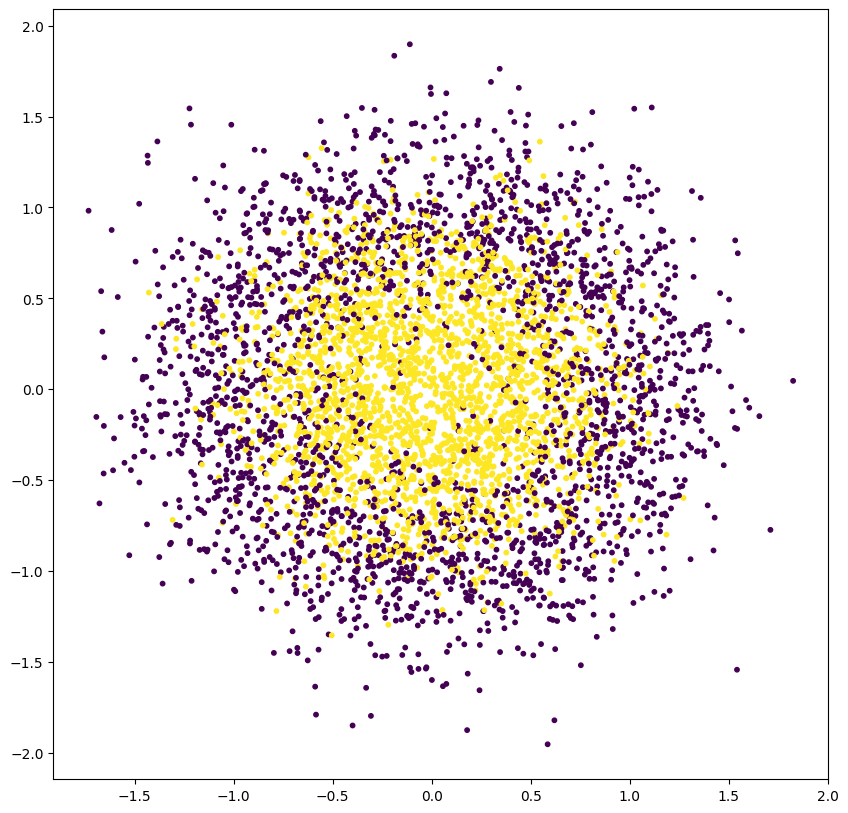

In [4]:
# Let's see the core part
print(f"Dataset data structure: {type(noisy_circles)}")

dataset = noisy_circles
f, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(dataset[0][:, 0], dataset[0][:, 1], s=10, c=dataset[1])

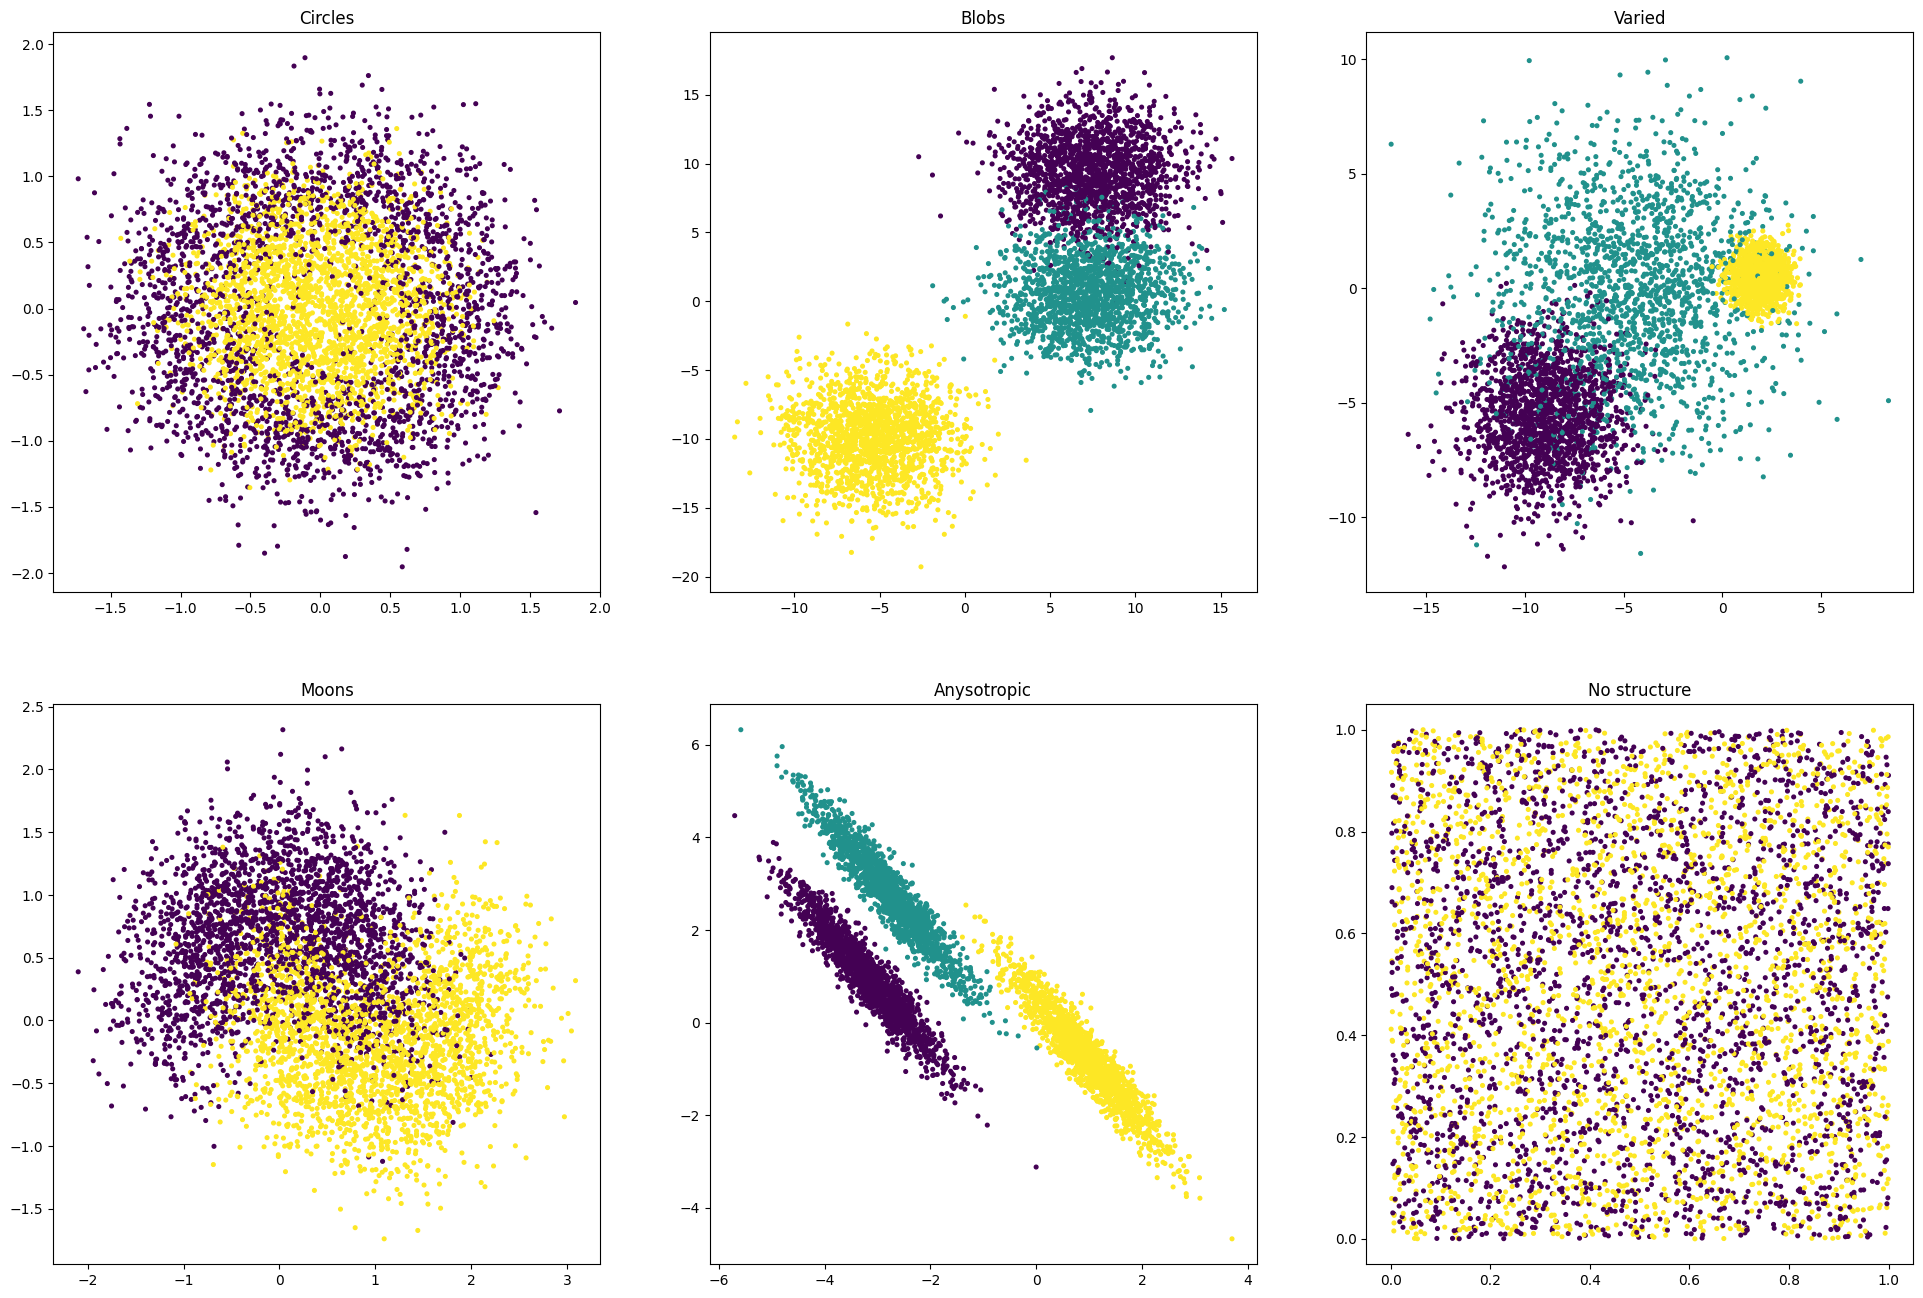

In [5]:
### Your code here
nrows = 2
ncols = 3
fig_width_px = 8

f, axs = plt.subplots(nrows, ncols, figsize=(fig_width_px*ncols, fig_width_px*nrows))
for dataset_id, dataset in enumerate(dataset_list):
    id_col = int(dataset_id/(ncols-1))
    id_row = dataset_id % nrows
    axs[id_row][id_col].scatter(dataset[0][:, 0], dataset[0][:, 1], s=7, c=dataset[1])
    axs[id_row][id_col].set_title(dataset_titles[dataset_id])

### Training and testing of a classifier

According to what explained during the classes, a typical pipeline for training a ML classifier is

1. Data cleaning and preprocessing;
2. select a dataset;
3. split into train and test;
4. fit a Sklearn model on the training data;
5. test the accuracy of the learned model on the test data.

#### Select a dataset and split into train and test

This can be easily done with the `train_test_split` function of Sklearn. Look at the `test_size` parameter.

In [6]:
from sklearn.model_selection import train_test_split

dataset = noisy_moons
X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.33, random_state=0)
print(dataset[0].shape)
print(X_train.shape)
print(X_test.shape)

(5000, 2)
(3350, 2)
(1650, 2)


#### Fit a Sklearn model on the training data and test the accuracy of the learned model on the test data.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate the model specifying its hyperparameters
clf = KNeighborsClassifier(n_neighbors=3, p=2)
print(clf.get_params())

# Training
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Evaluate the results by using the accuracy
print(100*accuracy_score(y_test, y_pred))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
83.87878787878788


#### Plot the decision boundaries of the classifier for the given dataset

With 2D data it is useful to print the decision boundaries of the learned classifier. Here below two functions for plotting such contours.

In [8]:
def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Given a dataset and a classifier, we can use the `make_meshgrid` and the `plot_contours` functions to study the behavior of our classifier

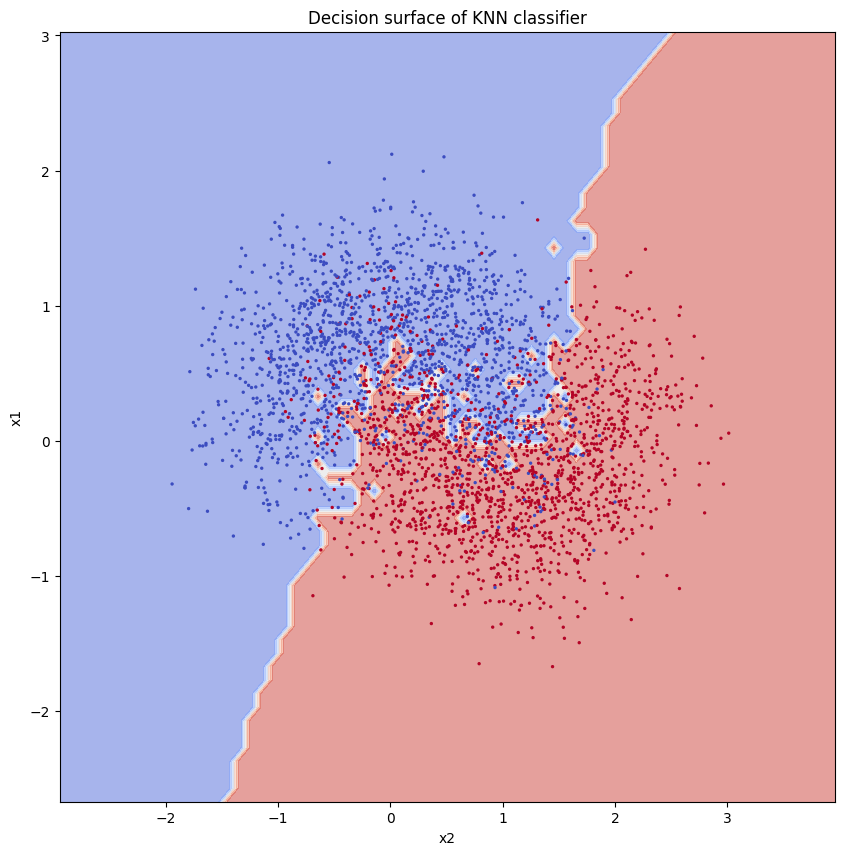

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=2)
ax.set_ylabel('x1')
ax.set_xlabel('x2')
ax.set_title('Decision surface of KNN classifier')
plt.show()

**Excercise 2**

Use subplot to plot the decision boundaries of the KNN classifier for each of the above datasets. Use `train_test_split` for splitting the dataset into training and test set. 

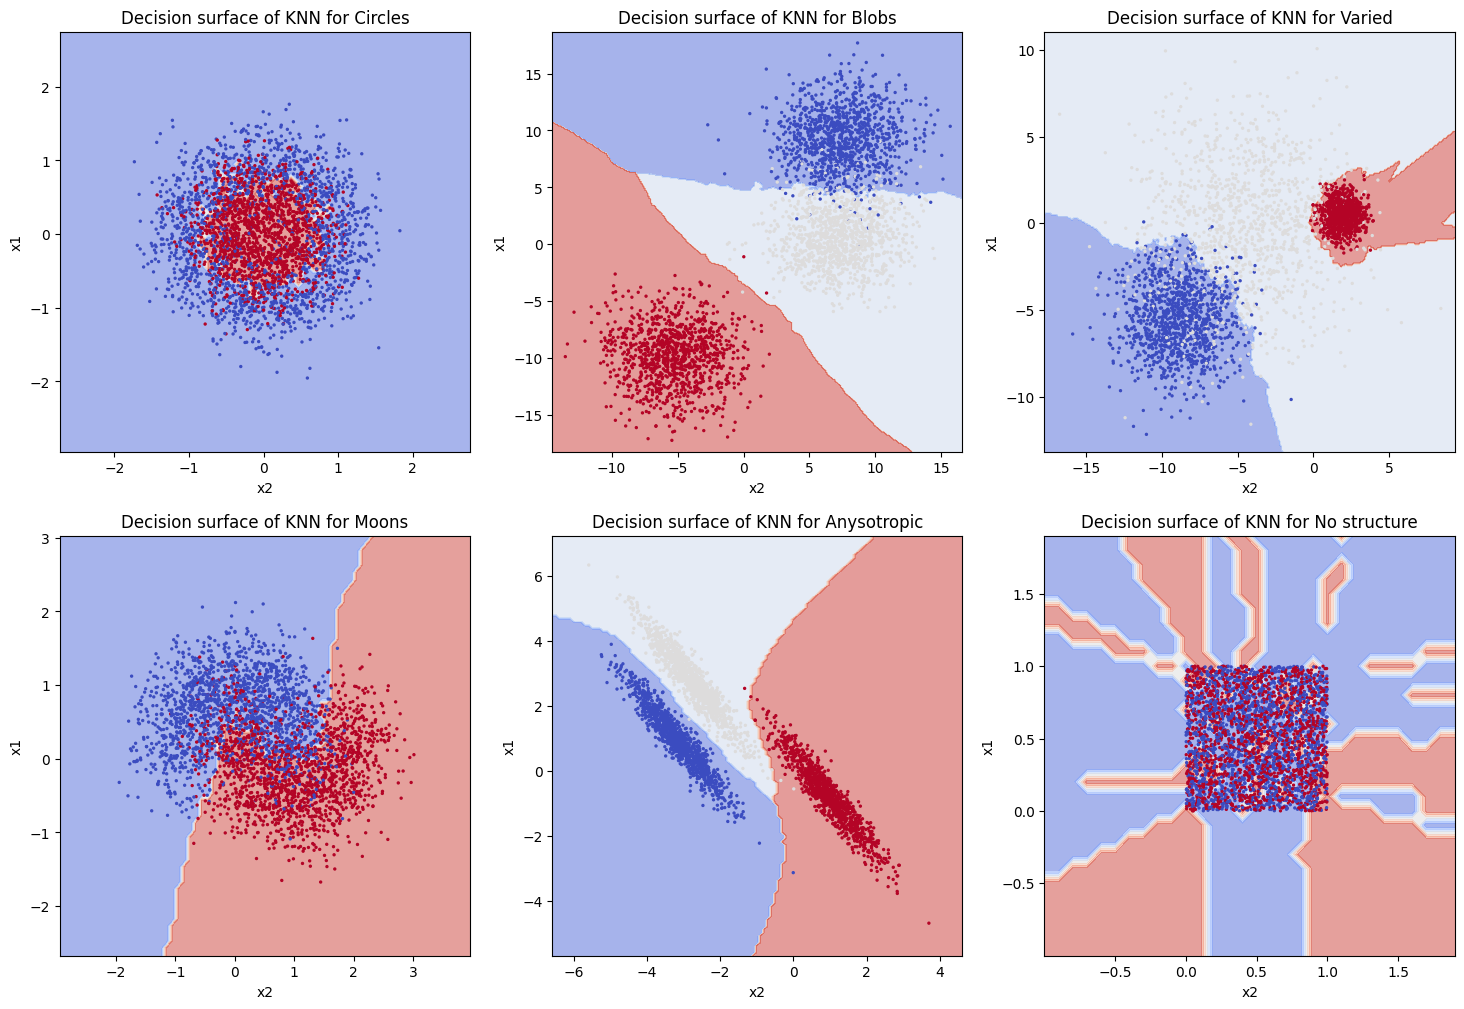

In [12]:
### your code here

nrows = 2
ncols = 3
fig_width_px = 6

f, axs = plt.subplots(nrows, ncols, figsize=(fig_width_px*ncols, fig_width_px*nrows))
for dataset_id, dataset in enumerate(dataset_list):
    
    # Split train and test
    X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.33, random_state=0)
    
    # Make a grid
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    # Train a classifier
    clf = KNeighborsClassifier(n_neighbors=10, p=2)
    clf.fit(X_train, y_train)
    
    # Print contours
    id_col = int(dataset_id/(ncols-1))
    id_row = dataset_id % nrows
    plot_contours(axs[id_row][id_col], clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
    axs[id_row][id_col].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=2)
    axs[id_row][id_col].set_ylabel('x1')
    axs[id_row][id_col].set_xlabel('x2')
    axs[id_row][id_col].set_title(f'Decision surface of KNN for {dataset_titles[dataset_id]}')

#### Playing with the classifier hyperparameters

The better strategy is to select a set of values for a given hyperparameter of a classifier and then choose the value that maximizes (only for now) the accuracy on the test set.

In [ ]:
#########################################
# Model fitting and evaluation
#########################################
dataset_list = [noisy_circles, noisy_moons, blobs, aniso, varied, no_structure]
dataset = varied
X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.33, random_state=0)


n_neighbors_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

trainAcc = np.zeros(len(n_neighbors_list))
testAcc = np.zeros(len(n_neighbors_list))

for index, k in enumerate(n_neighbors_list):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(n_neighbors_list, trainAcc,'ro-', n_neighbors_list, testAcc, 'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('K')
plt.ylabel('Accuracy')

**Excercise 3**

Use subplot to plot the accuracy trend by changing the number of $k$ neighbors for each dataset.

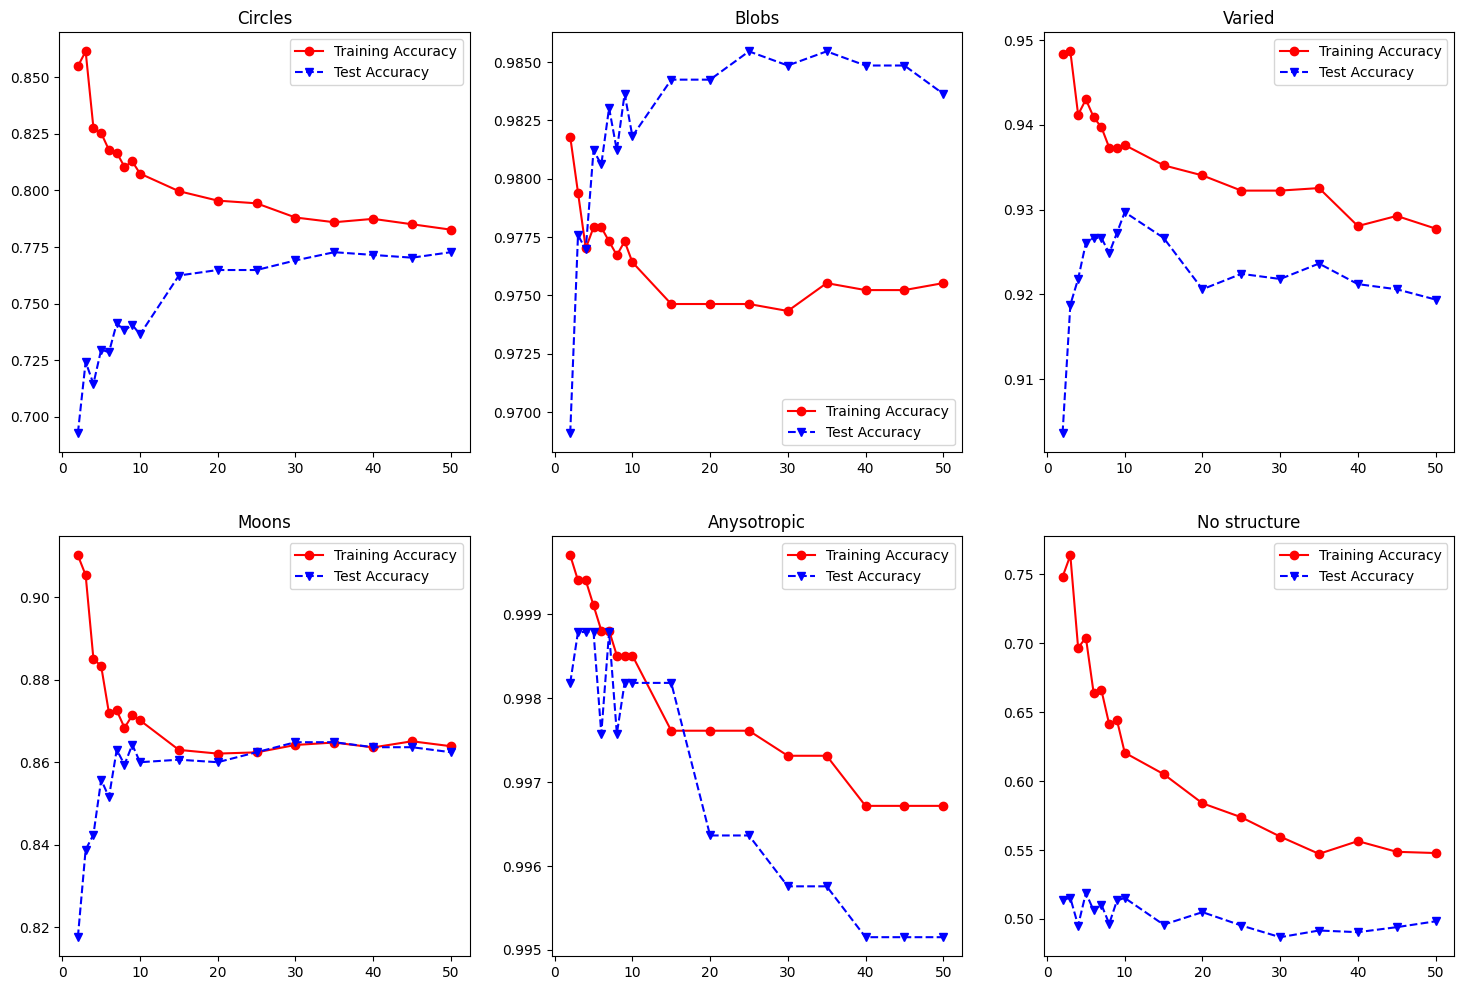

In [13]:
### your code here

nrows = 2
ncols = 3
fig_width_px = 6

f, axs = plt.subplots(nrows, ncols, figsize=(fig_width_px*ncols, fig_width_px*nrows))

hyperparam_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for dataset_id, dataset in enumerate(dataset_list):

    trainAcc = np.zeros(len(hyperparam_list))
    testAcc = np.zeros(len(hyperparam_list))
    
    # Split train and test
    X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.33, random_state=0)

    for index, k in enumerate(hyperparam_list):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf = clf.fit(X_train, y_train)
        y_predTrain = clf.predict(X_train)
        y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(y_train, y_predTrain)
        testAcc[index] = accuracy_score(y_test, y_predTest)
        index += 1
    
    id_col = int(dataset_id/(ncols - 1))
    id_row = dataset_id % nrows
    axs[id_row][id_col].plot(hyperparam_list, trainAcc,'ro-', hyperparam_list, testAcc, 'bv--')
    axs[id_row][id_col].legend(['Training Accuracy','Test Accuracy'])
    axs[id_row][id_col].set_title(f"{dataset_titles[dataset_id]}")

**Excercise 4**

Repeat exercises 2 and 3 by using Decision Trees with max-depth as hyperparameter.

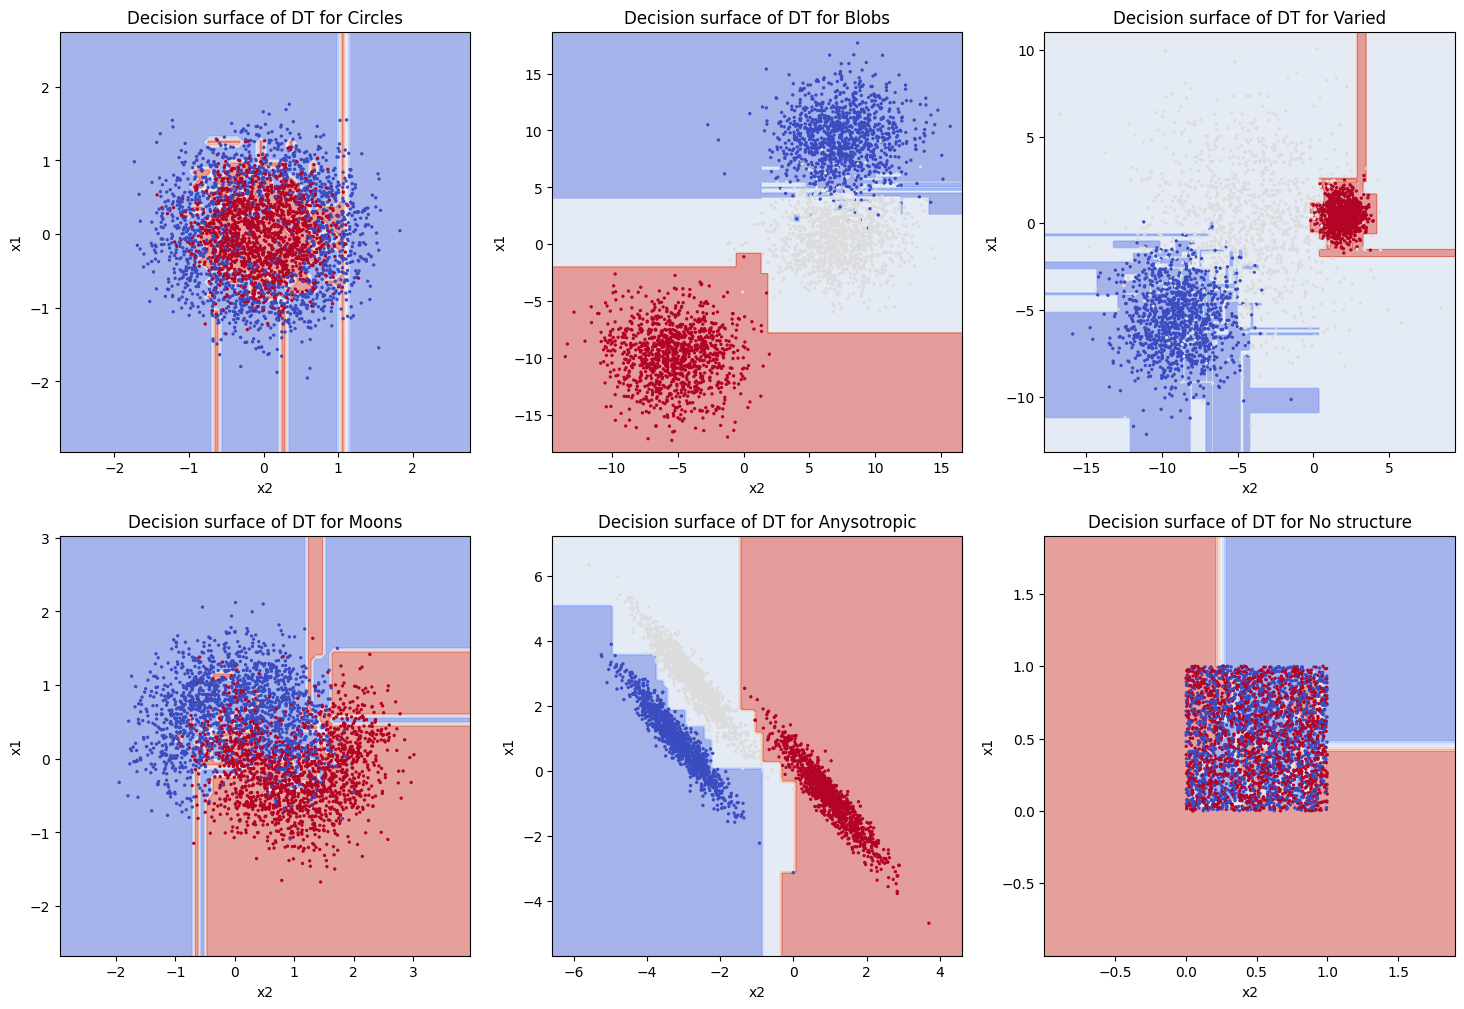

In [14]:
from sklearn.tree import DecisionTreeClassifier

### your code here

nrows = 2
ncols = 3
fig_width_px = 6

f, axs = plt.subplots(nrows, ncols, figsize=(fig_width_px*ncols, fig_width_px*nrows))
for dataset_id, dataset in enumerate(dataset_list):
    
    # Split train and test
    X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.33, random_state=0)
    
    # Make a grid
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    # Train a classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    # Print contours
    id_col = int(dataset_id/(ncols - 1))
    id_row = dataset_id % nrows
    plot_contours(axs[id_row][id_col], clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
    axs[id_row][id_col].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=2)
    axs[id_row][id_col].set_ylabel('x1')
    axs[id_row][id_col].set_xlabel('x2')
    axs[id_row][id_col].set_title(f'Decision surface of DT for {dataset_titles[dataset_id]}')

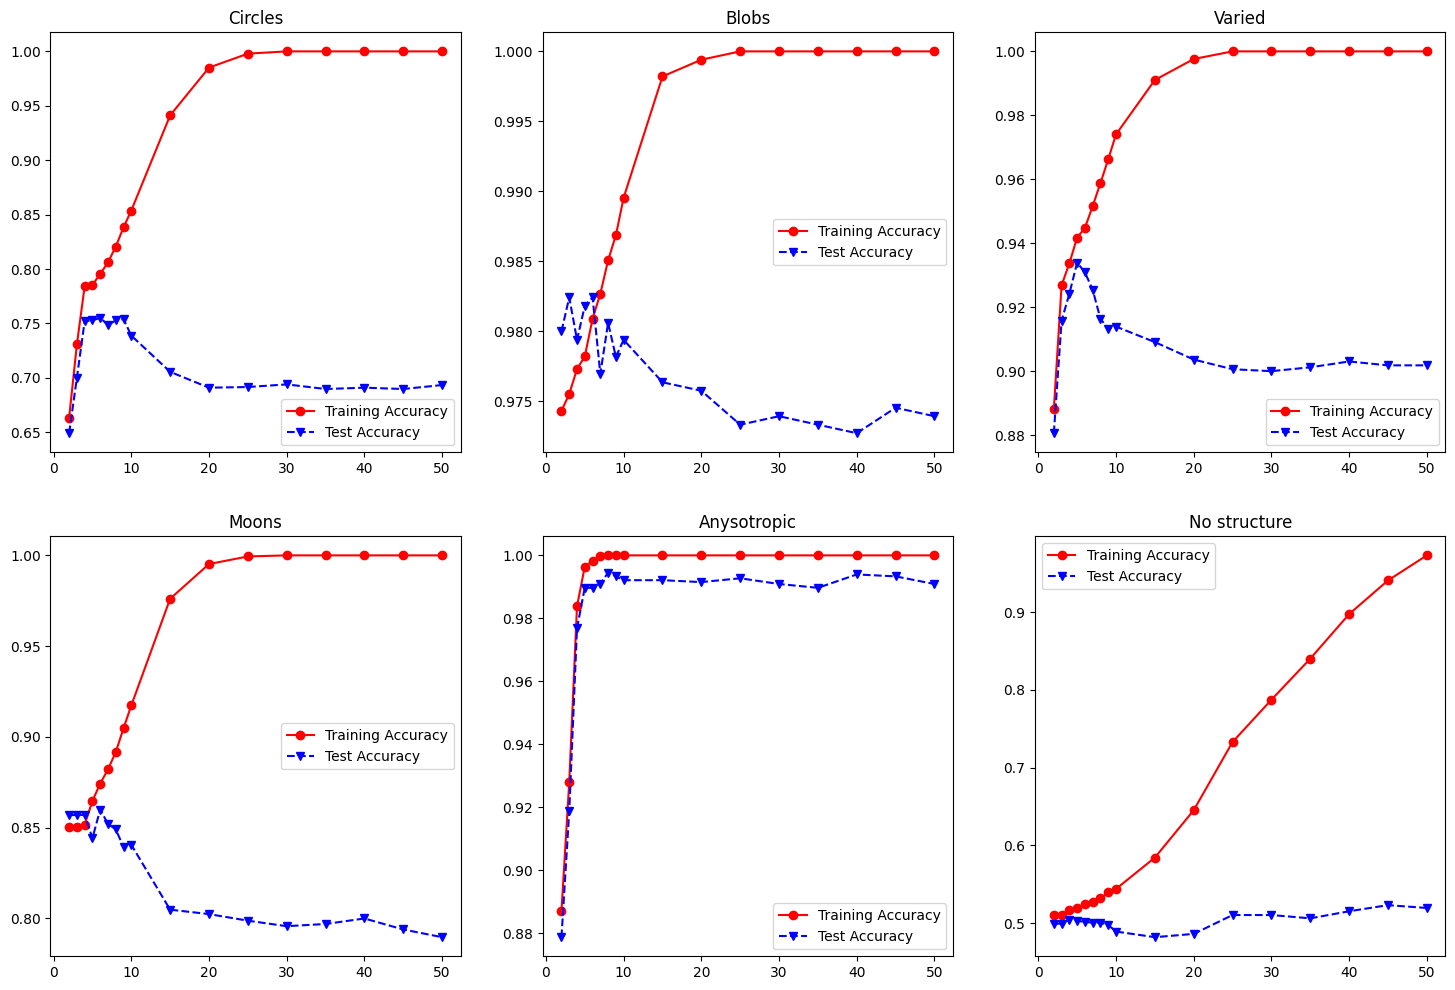

In [15]:
### your code here

nrows = 2
ncols = 3
fig_width_px = 6

f, axs = plt.subplots(nrows, ncols, figsize=(fig_width_px*ncols, fig_width_px*nrows))

hyperparam_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for dataset_id, dataset in enumerate(dataset_list):

    trainAcc = np.zeros(len(hyperparam_list))
    testAcc = np.zeros(len(hyperparam_list))
    
    # Split train and test
    X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.33, random_state=0)

    for index, k in enumerate(hyperparam_list):
        clf = DecisionTreeClassifier(max_depth=k)
        clf = clf.fit(X_train, y_train)
        y_predTrain = clf.predict(X_train)
        y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(y_train, y_predTrain)
        testAcc[index] = accuracy_score(y_test, y_predTest)
        index += 1
    
    id_col = int(dataset_id/(ncols - 1))
    id_row = dataset_id % nrows
    axs[id_row][id_col].plot(hyperparam_list, trainAcc,'ro-', hyperparam_list, testAcc, 'bv--')
    axs[id_row][id_col].legend(['Training Accuracy','Test Accuracy'])
    axs[id_row][id_col].set_title(f"{dataset_titles[dataset_id]}")

**Excercise 5** (can be skipped)

Repeat exercises 2 by using a GaussianNB.

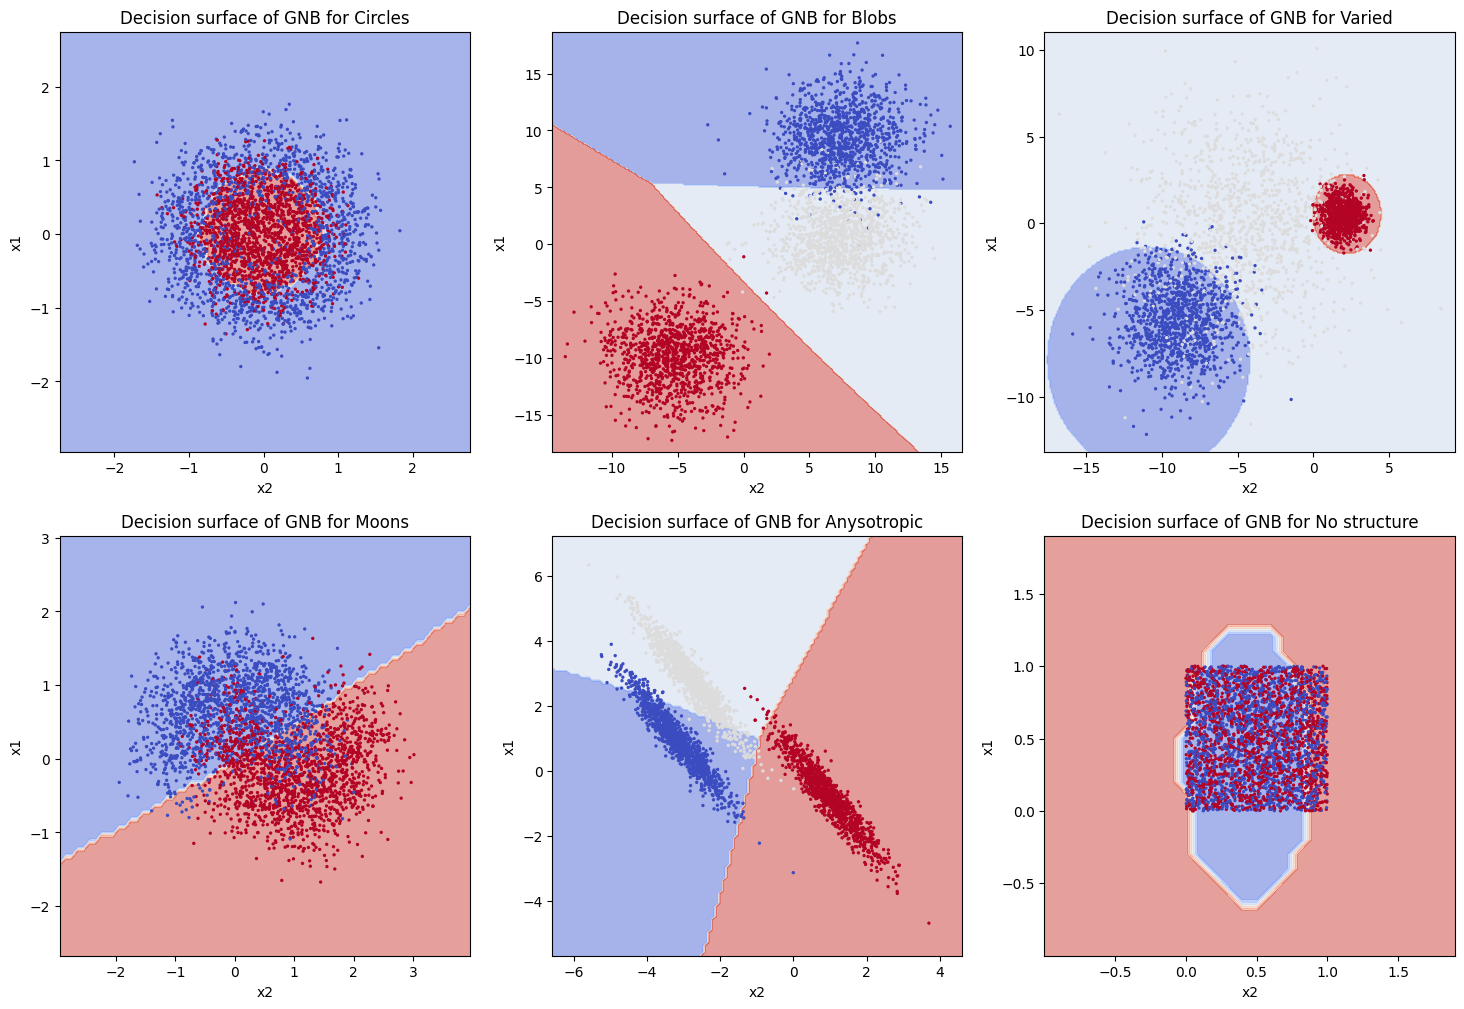

In [16]:
from sklearn.naive_bayes import GaussianNB

### your code here

nrows = 2
ncols = 3
fig_width_px = 6

f, axs = plt.subplots(nrows, ncols, figsize=(fig_width_px*ncols, fig_width_px*nrows))

for dataset_id, dataset in enumerate(dataset_list):
    
    # Split train and test
    X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.33, random_state=0)
    
    # Make a grid
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    # Train a classifier
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    # Print contours
    id_col = int(dataset_id/(ncols - 1))
    id_row = dataset_id % nrows
    plot_contours(axs[id_row][id_col], clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
    axs[id_row][id_col].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=2)
    axs[id_row][id_col].set_ylabel('x1')
    axs[id_row][id_col].set_xlabel('x2')
    axs[id_row][id_col].set_title(f'Decision surface of GNB for {dataset_titles[dataset_id]}')

**Excercise 6.a**

Repeat exercises 2 by using the SVMs with the 4 available kernels in Sklearn. Use subplots with 6 rows (one per dataset) and 4 columns (one per kernel). Use `degree=2` in the `poly` kernel.

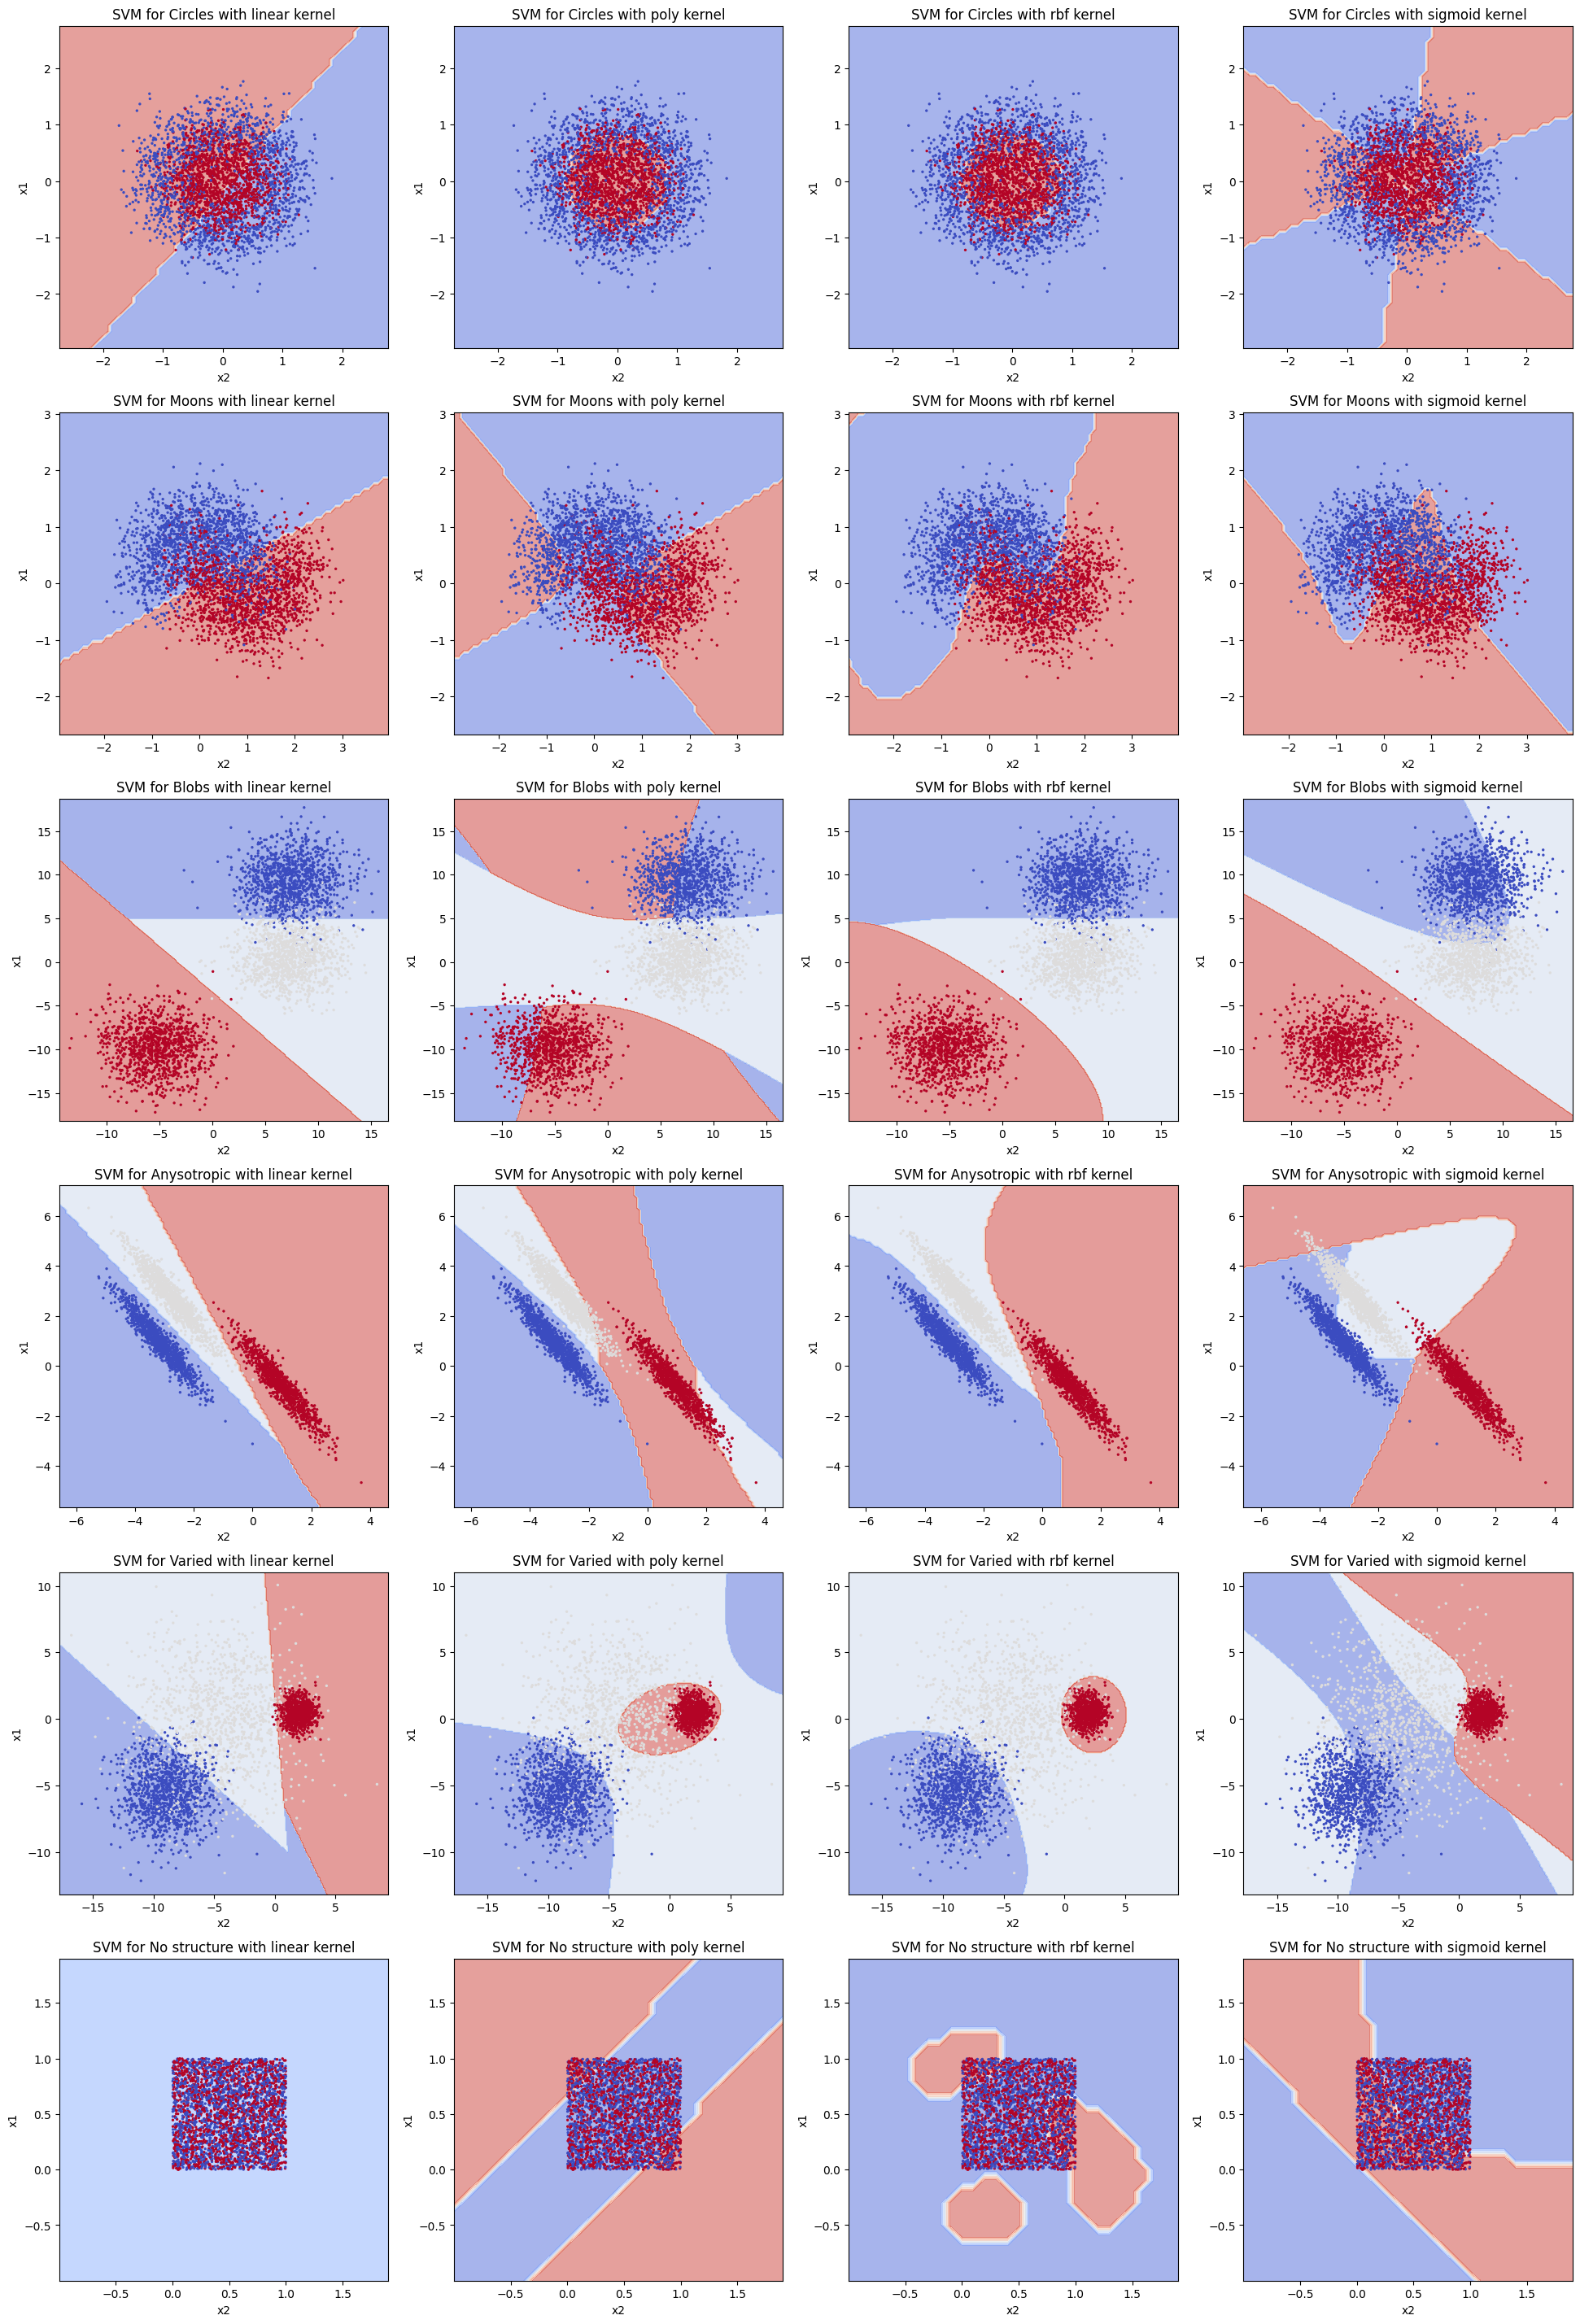

In [8]:
from sklearn.svm import SVC

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

### your code here (degree=2 for polynomial kernel)

nrows = 6
ncols = len(kernel_list)
fig_width_px = 6

f, axs = plt.subplots(nrows, ncols, figsize=(fig_width_px*ncols, fig_width_px*nrows))
for dataset_id, dataset in enumerate(dataset_list):
    for kernel_id, kernel in enumerate(kernel_list):
    
        # Split train and test
        X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.33, random_state=0)

        # Make a grid
        X0, X1 = X_train[:, 0], X_train[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        # Train a classifier
        clf = SVC(kernel=kernel, degree=2)
        clf.fit(X_train, y_train)

        # Print contours
        id_col = kernel_id
        id_row = dataset_id
        plot_contours(axs[id_row][id_col], clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
        axs[id_row][id_col].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=2)
        axs[id_row][id_col].set_ylabel('x1')
        axs[id_row][id_col].set_xlabel('x2')
        axs[id_row][id_col].set_title(f'SVM for {dataset_titles[dataset_id]} with {kernel} kernel')
plt.show()

**Excercise 6.b** (can be skipped)

Repeat exercises 6.a by using the SVMs with these values `[1, 2, 3, 4]` for the `degree` hyperparameter of the `poly` kernel. Use subplots with 6 rows (one per dataset) and 4 columns (one per degree).

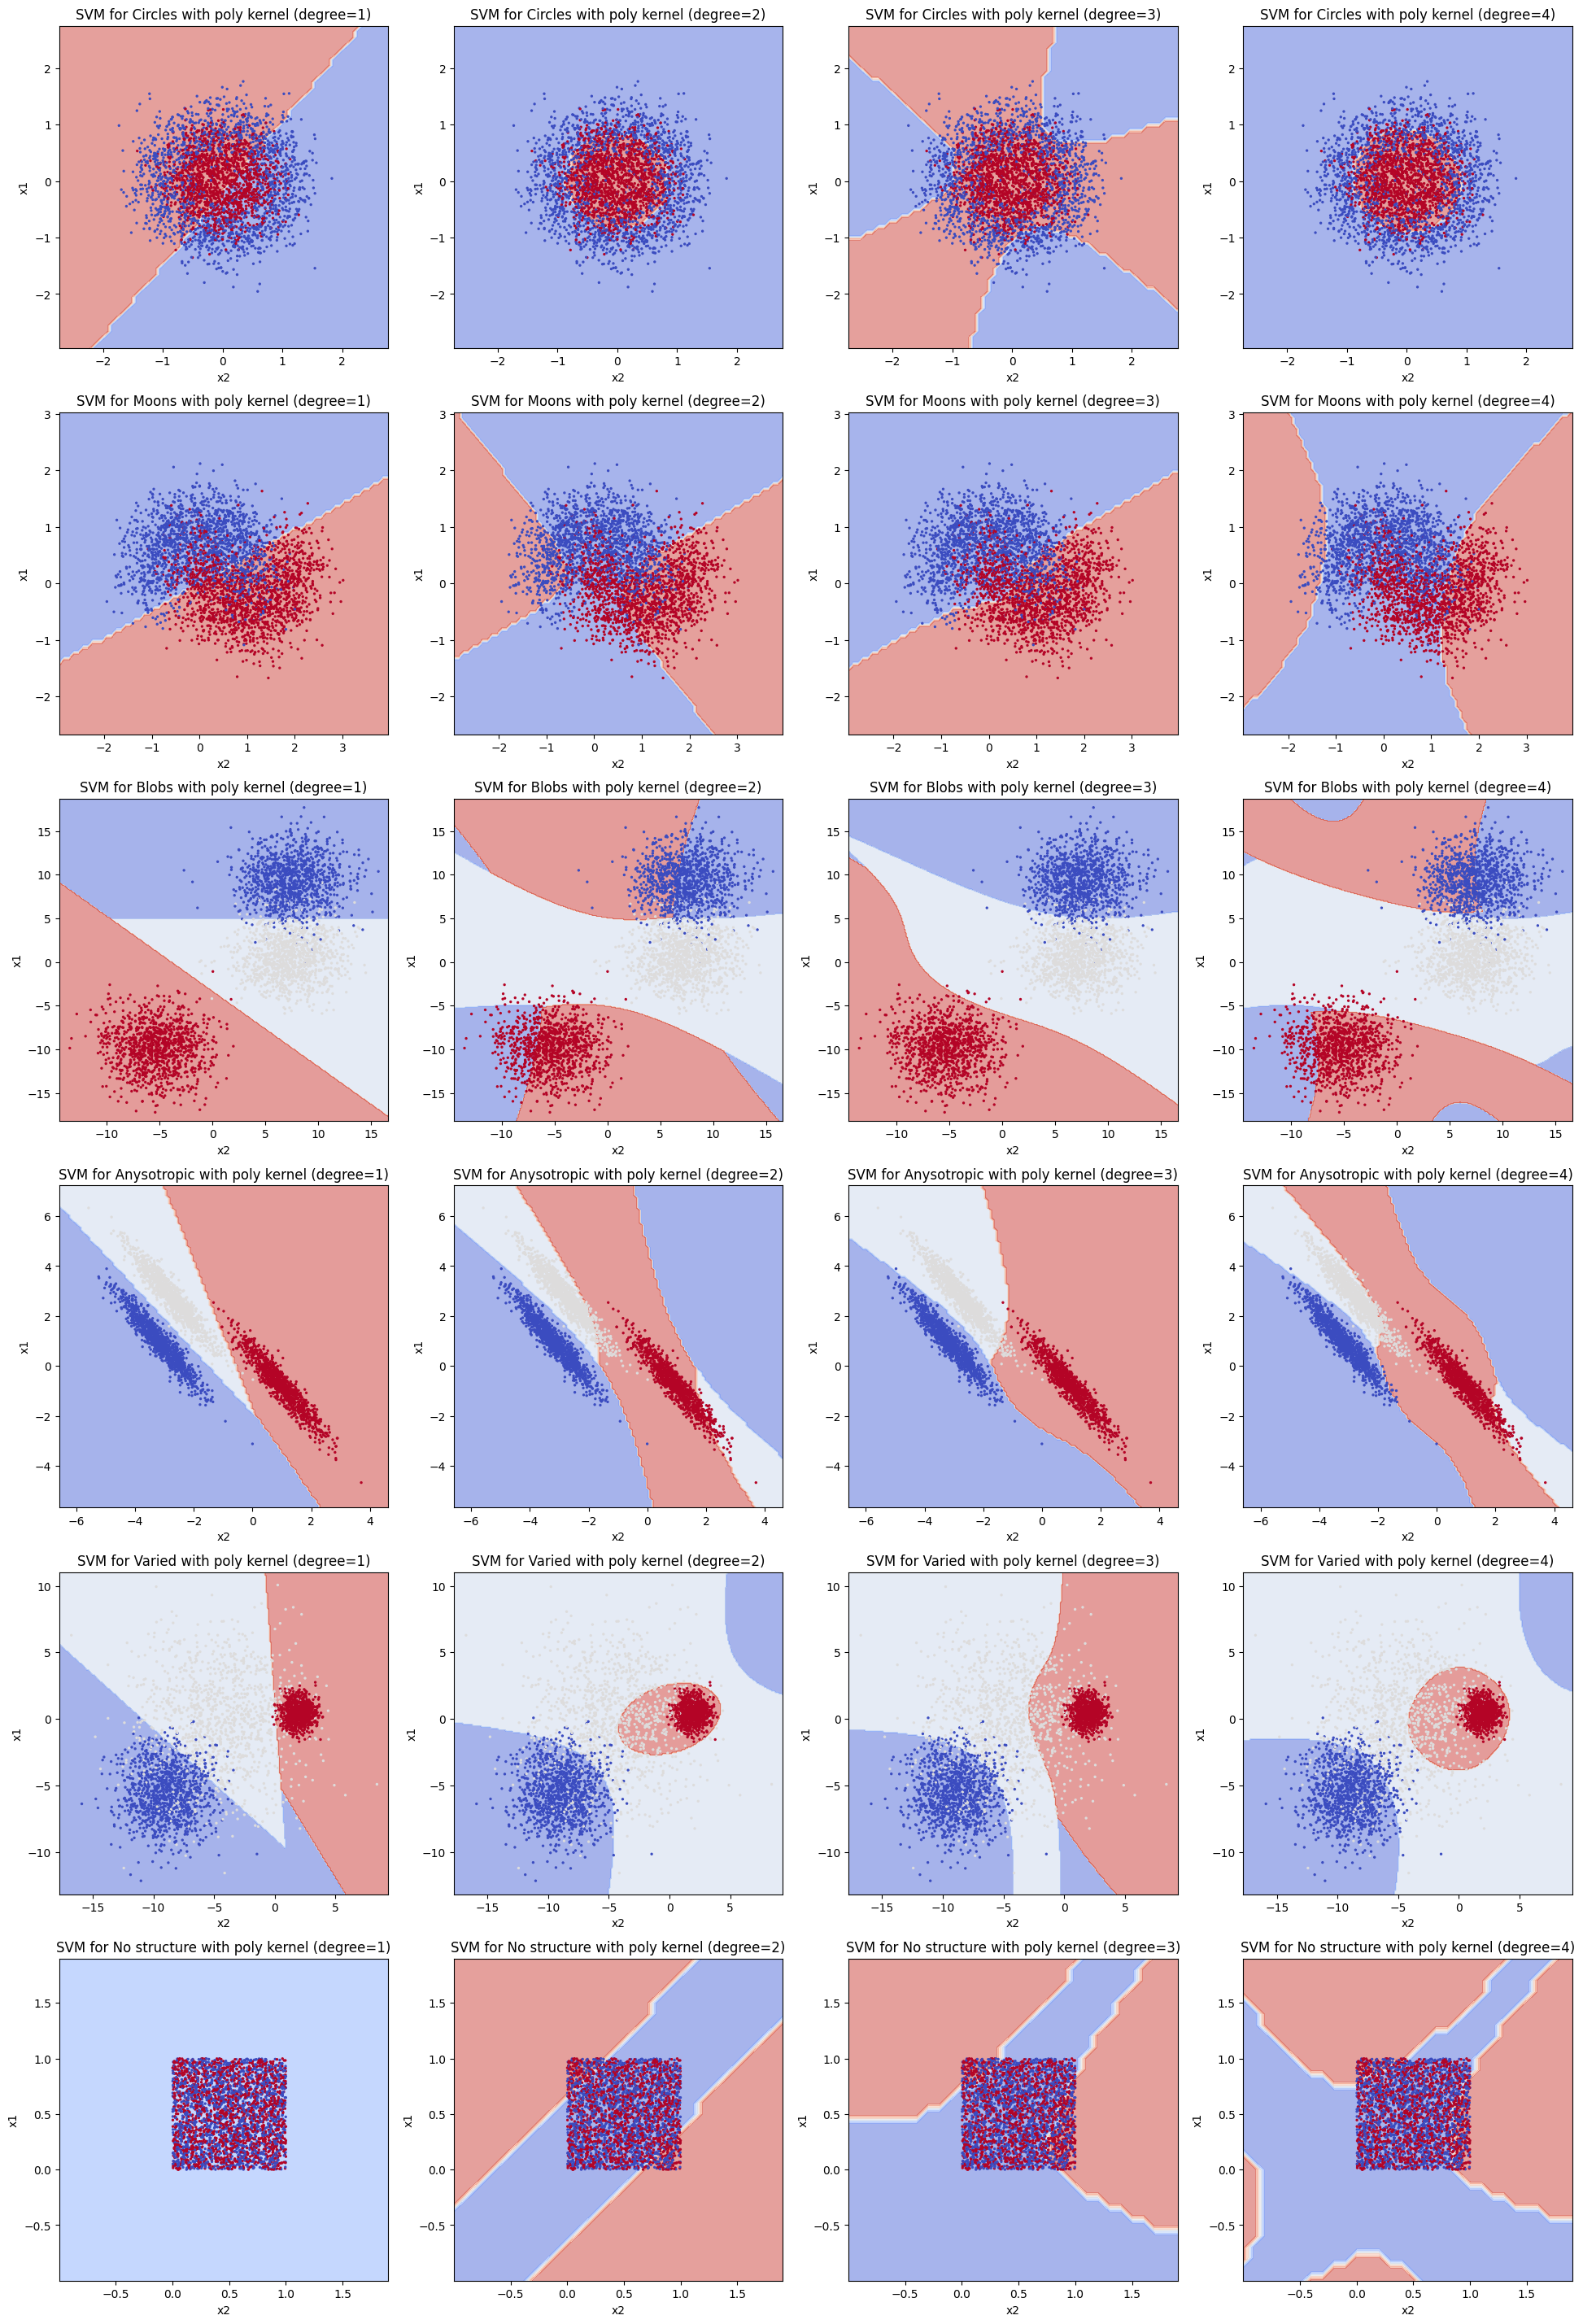

In [10]:
from sklearn.svm import SVC

### your code here
poly_degree = [1, 2, 3, 4]

nrows = 6
ncols = len(poly_degree)
fig_width_px = 6

f, axs = plt.subplots(nrows, ncols, figsize=(fig_width_px*ncols, fig_width_px*nrows))
for dataset_id, dataset in enumerate(dataset_list):
    for poly_id, degree in enumerate(poly_degree):
    
        # Split train and test
        X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.33, random_state=0)

        # Make a grid
        X0, X1 = X_train[:, 0], X_train[:, 1]
        xx, yy = make_meshgrid(X0, X1)

        # Train a classifier
        clf = SVC(kernel="poly", degree=degree)
        clf.fit(X_train, y_train)

        # Print contours
        id_col = poly_id
        id_row = dataset_id
        plot_contours(axs[id_row][id_col], clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
        axs[id_row][id_col].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=2)
        axs[id_row][id_col].set_ylabel('x1')
        axs[id_row][id_col].set_xlabel('x2')
        axs[id_row][id_col].set_title(f'SVM for {dataset_titles[dataset_id]} with poly kernel (degree={degree})')
plt.show()

**Excercise 7**

Repeat exercises 3 by using the SVMs with C as hyperparameter. Use `[0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]` as search space for C. Use `rbf` as kernel.

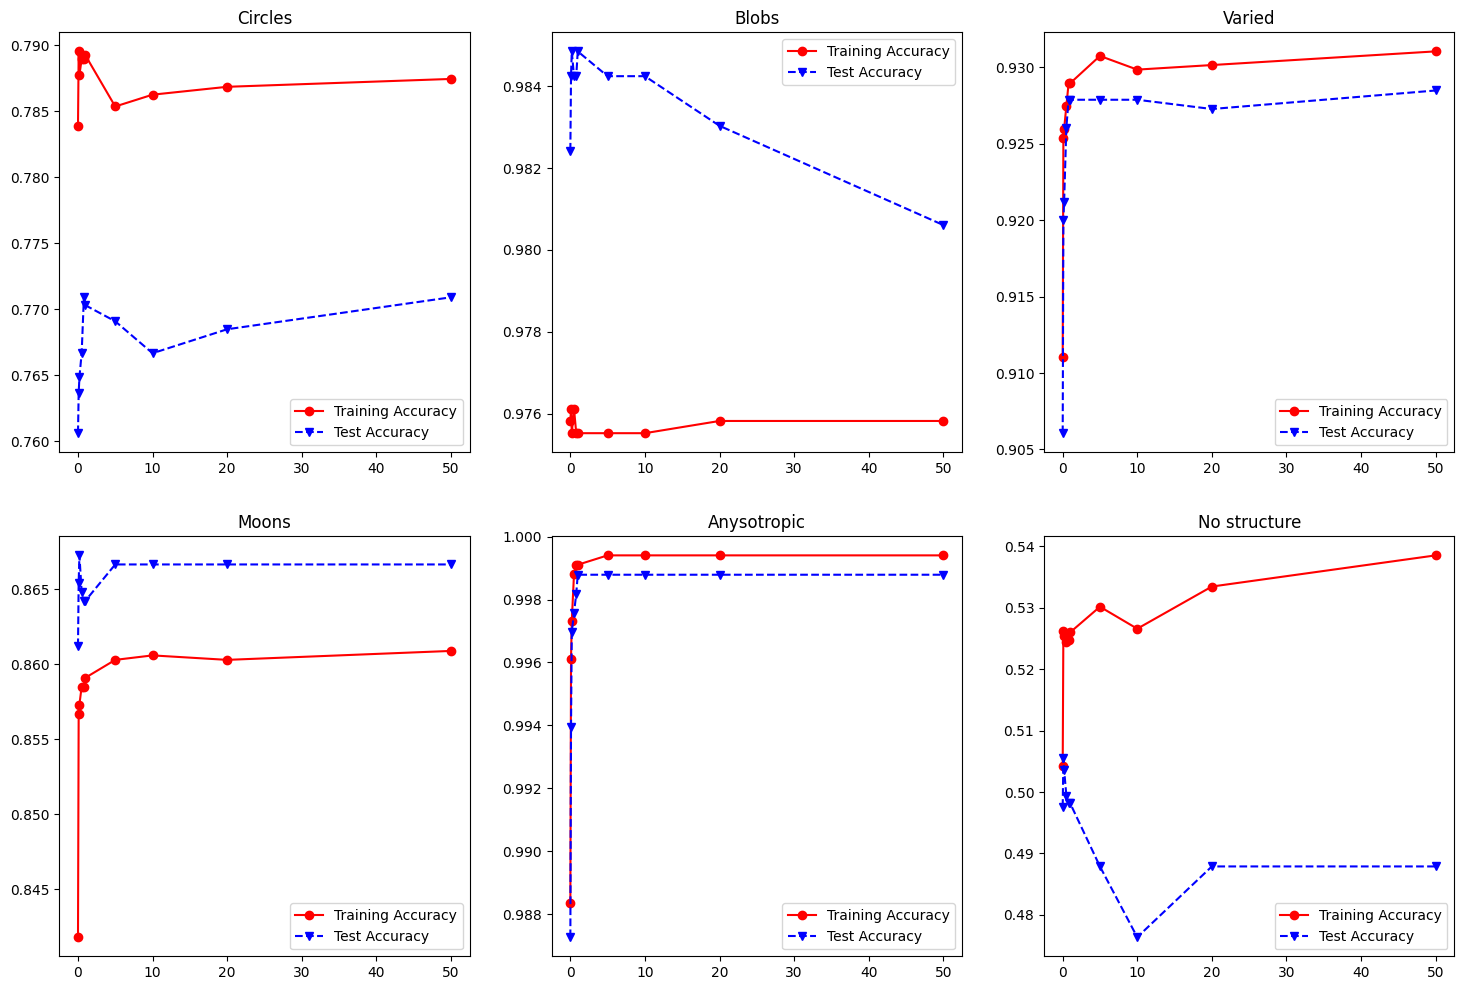

In [11]:
### your code here

nrows = 2
ncols = 3
fig_width_px = 6

f, axs = plt.subplots(nrows, ncols, figsize=(fig_width_px*ncols, fig_width_px*nrows))

hyperparam_list = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

for dataset_id, dataset in enumerate(dataset_list):

    trainAcc = np.zeros(len(hyperparam_list))
    testAcc = np.zeros(len(hyperparam_list))
    
    # Split train and test
    X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.33, random_state=0)

    for index, k in enumerate(hyperparam_list):
        clf = clf = SVC(C=k, kernel="rbf")
        clf = clf.fit(X_train, y_train)
        y_predTrain = clf.predict(X_train)
        y_predTest = clf.predict(X_test)
        trainAcc[index] = accuracy_score(y_train, y_predTrain)
        testAcc[index] = accuracy_score(y_test, y_predTest)
    
    id_col = int(dataset_id/(ncols - 1))
    id_row = dataset_id % nrows
    axs[id_row][id_col].plot(hyperparam_list, trainAcc,'ro-', hyperparam_list, testAcc, 'bv--')
    axs[id_row][id_col].legend(['Training Accuracy','Test Accuracy'])
    axs[id_row][id_col].set_title(f"{dataset_titles[dataset_id]}")

## Performing Sentiment Analysis With Naive Bayes Classifier

Assume you wish to categorize user reviews as good or bad. Sentiment Analysis is a popular task to be performed by data scientists. This is a simple exercise using Naive Bayes Classifier and Scikit-learn to create a Google Play store reviews classifier (Sentiment Analysis) in Python.

Naive Bayes is the simplest and fastest classification algorithm for a large chunk of data. In various applications such as spam filtering, text classification, sentiment analysis, and recommendation systems, Naive Bayes classifier is used successfully. It uses the Bayes probability theorem for unknown class prediction.

The Naive Bayes classification technique is a simple and powerful classification task in machine learning. The use of Bayes’ theorem with a strong independence assumption between the features is the basis for naive Bayes classification. When used for textual data analysis, such as Natural Language Processing, the Naive Bayes classification yields good results.

Simple Bayes or independent Bayes models are other names for nave Bayes models. All of these terms refer to the classifier’s decision rule using Bayes’ theorem. In practice, the Bayes theorem is applied by the Naive Bayes classifier. The power of Bayes’ theorem is brought to machine learning with this classifier.

**Exercise 8**

Perform sentiment analysis on the app reviews of Google play app store. You have to classify each review according to its polarity:
- 0 means BAD review;
- 1 means POSITIVE review;

To do this you have to implement the following ML pipeline:

1. Import `google_play_store_apps_reviews_training.csv`.
2. Perform data cleaning by i) dropping the `package_name` columns, ii) trimming whitespaces (see the `str.strip()` Pandas function), iii) trasforming each review in lower case characters (see the `str.lower()` Pandas function), iv) removing punctuation with withespaces (see the `str.replace('[^\w]', ' ')` Pandas function).
3. Split into training and testing data.
4. Vectorize text reviews to numbers. Use each word as a feature and count the number of occurences of that word in each review. Use `CountVectorizer` from Sklearn (use the English stopwords).
5. Train a MultinomialNB classifier and compute the accuracy score on the test set.
6. Train a GaussianNB classifier and compute the accuracy score on the test set.
7. Which is best?
8. Predict the polarity and the score of the following reviews "Love this app simply awesome!", "It works but it is too slow" with the best model between MultinomialNB and GaussianNB. Are the results correct?

In [17]:
### your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score

In [18]:
# Import `google_play_store_apps_reviews_training.csv`.
data = pd.read_csv('google_play_store_apps_reviews_training.csv')
data.head()

package_name                                             review  \
0  com.facebook.katana   privacy at least put some option appear offli...   
1  com.facebook.katana   messenger issues ever since the last update, ...   
2  com.facebook.katana   profile any time my wife or anybody has more ...   
3  com.facebook.katana   the new features suck for those of us who don...   
4  com.facebook.katana   forced reload on uploading pic on replying co...   

   polarity  
0         0  
1         0  
2         0  
3         0  
4         0

In [19]:
# data cleaning
data = data.drop('package_name', axis=1)
data['review'] = data['review'].str.strip().str.lower().str.replace('[^\w]', ' ')
data.head()

review  polarity
0  privacy at least put some option appear offlin...         0
1  messenger issues ever since the last update, i...         0
2  profile any time my wife or anybody has more t...         0
3  the new features suck for those of us who don'...         0
4  forced reload on uploading pic on replying com...         0

In [20]:
# Split into training and testing data
x = data['review']
y = data['polarity']
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

In [21]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
X_train = vec.fit_transform(X_train).toarray()
X_test = vec.transform(X_test).toarray()

In [22]:
# Train a MultinomialNB classifier and compute the accuracy score on the test set.
modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)
y_pred = modelNB.predict(X_test)
accuracy_score(y_pred, y_test)

0.8565022421524664

In [23]:
# Train a GaussianNB classifier and compute the accuracy score on the test set.
modelGauss = GaussianNB()
modelGauss.fit(X_train, y_train)
y_pred = modelGauss.predict(X_test)
accuracy_score(y_pred, y_test)

0.8071748878923767

In [24]:
# Predict the polarity and the score of some reviews
print(f"Polarity of Love this app simply awesome!: {modelNB.predict(vec.transform(['Love this app simply awesome!']))} with score {modelNB.predict_proba(vec.transform(['Love this app simply awesome!']))}")
print(f"Polarity of It works but it is too slow: {modelNB.predict(vec.transform(['It works but it is too slow']))} with score {modelNB.predict_proba(vec.transform(['It works but it is too slow']))}")

Polarity of Love this app simply awesome!: [1] with score [[0.04202863 0.95797137]]
Polarity of It works but it is too slow: [0] with score [[0.80517842 0.19482158]]


It is possible to inspect the `vec` object to have some insights on the created feature vocabulary

In [32]:
print(len(vec.get_feature_names_out()))
vec.get_feature_names_out()[80:120]

3161


array(['absolutely', 'accecesible', 'accepted', 'accesible', 'access',
       'accessed', 'accessible', 'accessing', 'accident', 'accidently',
       'accomplish', 'according', 'accordion', 'account', 'accounts',
       'accumulated', 'accurate', 'achievement', 'achievements', 'achive',
       'action', 'actions', 'active', 'activities', 'activity', 'acts',
       'actual', 'actually', 'ad', 'adage', 'adblock', 'add', 'added',
       'addicted', 'addicting', 'addictive', 'adding', 'addition',
       'additional', 'addons'], dtype=object)

It is possible to inspect the trained model to obtain the classes, their prior probability and the learned probabilities $P(X_i=word|y)$.

In [27]:
modelNB.classes_

array([0, 1])

In [28]:
print(f"Class log probabilities {modelNB.class_log_prior_}")
print(f"Class probabilities {np.exp(modelNB.class_log_prior_)}")
print(f"Sum of class probabilities {np.sum(np.exp(modelNB.class_log_prior_))}")

Class log probabilities [-0.42206926 -1.06620886]
Class probabilities [0.65568862 0.34431138]
Sum of class probabilities 1.0000000000000007


In [29]:
model_learnt_proba = modelNB.feature_log_prob_
print(np.exp(model_learnt_proba[0])) # P(X_i=word|y=0)
print(np.exp(model_learnt_proba[1])) # P(X_i=word|y=1)
print(model_learnt_proba[0].shape)

[1.58516288e-04 1.58516288e-04 6.34065150e-04 ... 1.58516288e-04
 7.92581438e-05 7.92581438e-05]
[0.00013822 0.00013822 0.00027643 ... 0.00110574 0.00027643 0.00027643]
(3161,)


**Exercise 9**

Given a document id (e.g., `doc_id = 1`), return the conditional probabilities of its features by:

1. accessing the encoded document in the document-term matrix available in the training/test set through `doc_id` (i.e., the row index);
2. printing the features: the words with value > 0 in the vectorizer object;
3. printing the probabilities $P(X_i=word|Y=pos)$ (use `np.exp` to convert the logs) where $word$ is a single word with value > 0 in the vectorization;
4. printing the probabilities $P(X_i=word|Y=neg)$ (use `np.exp` to convert the logs) where $word$ is a single word with value > 0 in the vectorization;

In [36]:
### your code here
doc_id = 1

# print the features: the words with value > 0 in the vectorizer object
feat_names = np.array(vec.get_feature_names_out())
print(feat_names[X_train[doc_id] > 0])

# print the probabilities P(X_i|Y=pos) (use np.exp to convert the logs) where X_i is a single word with value > 0 in the vectorization
pos_prob = modelNB.feature_log_prob_[1]
print(np.exp(pos_prob[X_train[doc_id] > 0]))

# print the probabilities P(X_i|Y=neg) (use np.exp to convert the logs) where X_i is a single word with value > 0 in the vectorization
neg_prob = modelNB.feature_log_prob_[0]
print(np.exp(neg_prob[X_train[doc_id] > 0]))

['awsome' 'bit' 'crash' 'doesnt' 'great' 'lag' 'media' 'phone' 'pleaz'
 'social' 'type' 'update' 'used' 'wrong']
[0.00027643 0.00138217 0.00041465 0.00027643 0.00870767 0.00041465
 0.00013822 0.00152039 0.00013822 0.00013822 0.00110574 0.00234969
 0.00248791 0.00041465]
[0.00015852 0.00047555 0.00039629 0.00039629 0.00269478 0.00055481
 0.00031703 0.00420068 0.00015852 0.00023777 0.00039629 0.01038282
 0.00206071 0.00087184]


**Exercise 10**

Repeat exercise 8 by:
1. Comparing the accuracies of `KNeighborsClassifier()`, `SVC()`, `DecisionTreeClassifier()`, `GaussianNB()`, `MultinomialNB()` with the vectorizers `TfidfVectorizer()` and `CountVectorizer()`. Have a look at what `TfidfVectorizer` does.
2. Repeat point 1 by using the English stopwords.
3. Which is the best combination of classifier and vectorizer?
4. Is it helpful to use the stopwords?

In [37]:
### your code here

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore') 

data = pd.read_csv('google_play_store_apps_reviews_training.csv')
data.head()

# data cleaning
data = data.drop('package_name', axis=1)
data['review'] = data['review'].str.strip().str.lower().str.replace('[^\w]', ' ')

# Split into training and testing data
x = data['review']
y = data['polarity']
X_train_tmp, X_test_tmp, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

classifiers = [KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), GaussianNB(), MultinomialNB()]
vectorizers = [TfidfVectorizer(), CountVectorizer()]
vectorizers_stop_words = [TfidfVectorizer(stop_words='english'), CountVectorizer(stop_words='english')]

def run_experiments(classifiers, vectorizers):
    for model in classifiers:
        for vec in vectorizers:
            X_train = vec.fit_transform(X_train_tmp).toarray()
            X_test = vec.transform(X_test_tmp).toarray()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(f"Accuracy for {model} with vectorizer {vec}: {100*accuracy_score(y_pred, y_test):.2f}")

print('No stopwords removal')
run_experiments(classifiers, vectorizers)
print('With stopwords removal')
run_experiments(classifiers, vectorizers_stop_words)

No stopwords removal
Accuracy for KNeighborsClassifier() with vectorizer TfidfVectorizer(): 84.75
Accuracy for KNeighborsClassifier() with vectorizer CountVectorizer(): 51.57
Accuracy for SVC() with vectorizer TfidfVectorizer(): 79.82
Accuracy for SVC() with vectorizer CountVectorizer(): 78.92
Accuracy for DecisionTreeClassifier() with vectorizer TfidfVectorizer(): 68.16
Accuracy for DecisionTreeClassifier() with vectorizer CountVectorizer(): 70.85
Accuracy for GaussianNB() with vectorizer TfidfVectorizer(): 80.27
Accuracy for GaussianNB() with vectorizer CountVectorizer(): 81.61
Accuracy for MultinomialNB() with vectorizer TfidfVectorizer(): 70.40
Accuracy for MultinomialNB() with vectorizer CountVectorizer(): 82.51
With stopwords removal
Accuracy for KNeighborsClassifier() with vectorizer TfidfVectorizer(stop_words='english'): 80.72
Accuracy for KNeighborsClassifier() with vectorizer CountVectorizer(stop_words='english'): 36.77
Accuracy for SVC() with vectorizer TfidfVectorizer(stop_

**Exercise 11**

Repeat exercise 10 with only `KNN` but trying the `cosine`, `jaccard` and `manhattan` metrics (see the KNN doc):

- Cosine similarity $$\frac{\sum_i a_i \cdot b_i}{||\mathbf{a}||||\mathbf{b}||}$$
- Jaccard similarity $$\frac{|A \cap B|}{|A \cup B|}$$
- Manhattan similarity $$\sum_i |a_i - b_i|$$

In [39]:
### your code here

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline

data = pd.read_csv('google_play_store_apps_reviews_training.csv')
data.head()

# data cleaning
data = data.drop('package_name', axis=1)
data['review'] = data['review'].str.strip().str.lower().str.replace('[^\w]', ' ')

# Split into training and testing data
x = data['review']
y = data['polarity']
X_train_tmp, X_test_tmp, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

classifiers = [KNeighborsClassifier(), KNeighborsClassifier(metric='cosine'), KNeighborsClassifier(metric='jaccard'), KNeighborsClassifier(metric='manhattan')]
vectorizers = [TfidfVectorizer(), CountVectorizer()]
vectorizers_stop_words = [TfidfVectorizer(stop_words='english'), CountVectorizer(stop_words='english')]

def run_experiments(classifiers, vectorizers):
    for vec in vectorizers:
        for model in classifiers:
            X_train = vec.fit_transform(X_train_tmp).toarray()
            X_test = vec.transform(X_test_tmp).toarray()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(f"Accuracy for {model} with vectorizer {vec}: {100*accuracy_score(y_pred, y_test):.2f}")

print('No stopwords removal')
run_experiments(classifiers, vectorizers)
print('With stopwords removal')
run_experiments(classifiers, vectorizers_stop_words)

No stopwords removal
Accuracy for KNeighborsClassifier() with vectorizer TfidfVectorizer(): 84.75
Accuracy for KNeighborsClassifier(metric='cosine') with vectorizer TfidfVectorizer(): 85.20
Accuracy for KNeighborsClassifier(metric='jaccard') with vectorizer TfidfVectorizer(): 78.92
Accuracy for KNeighborsClassifier(metric='manhattan') with vectorizer TfidfVectorizer(): 34.53
Accuracy for KNeighborsClassifier() with vectorizer CountVectorizer(): 51.57
Accuracy for KNeighborsClassifier(metric='cosine') with vectorizer CountVectorizer(): 76.23
Accuracy for KNeighborsClassifier(metric='jaccard') with vectorizer CountVectorizer(): 78.92
Accuracy for KNeighborsClassifier(metric='manhattan') with vectorizer CountVectorizer(): 35.87
With stopwords removal
Accuracy for KNeighborsClassifier() with vectorizer TfidfVectorizer(stop_words='english'): 80.72
Accuracy for KNeighborsClassifier(metric='cosine') with vectorizer TfidfVectorizer(stop_words='english'): 80.72
Accuracy for KNeighborsClassifier